In [1]:
import os
import h5py
import cv2
import numpy as np
import pandas as pd
import sklearn as skl
from matplotlib import pyplot as plt

from pdf2image import convert_from_path, convert_from_bytes

### install tesseract

sudo apt install tesseract-ocr

sudo apt install libtesseract-dev

conda install -c conda-forge pytesseract

In [2]:
import pytesseract

In [3]:
# set home directory
home_path = os.getcwd()[:os.getcwd().find('Code/python/obf_autax/ocr')-1]
# set input_path
input_path = os.path.join(home_path, 'Data', 'obf', 'Operat Hinterriß.pdf')

In [4]:
input_path

'/home/philipp/Data/obf/Operat Hinterriß.pdf'

In [5]:
pwd

'/home/philipp/Code/python/obf_autax/ocr'

In [6]:
def convert_to_image(input_path, page_nr):

    pages = convert_from_path(input_path, 500, first_page=page_nr, last_page=page_nr)

    return pages[0]

In [7]:
img = convert_to_image(input_path, 3).convert('RGB')

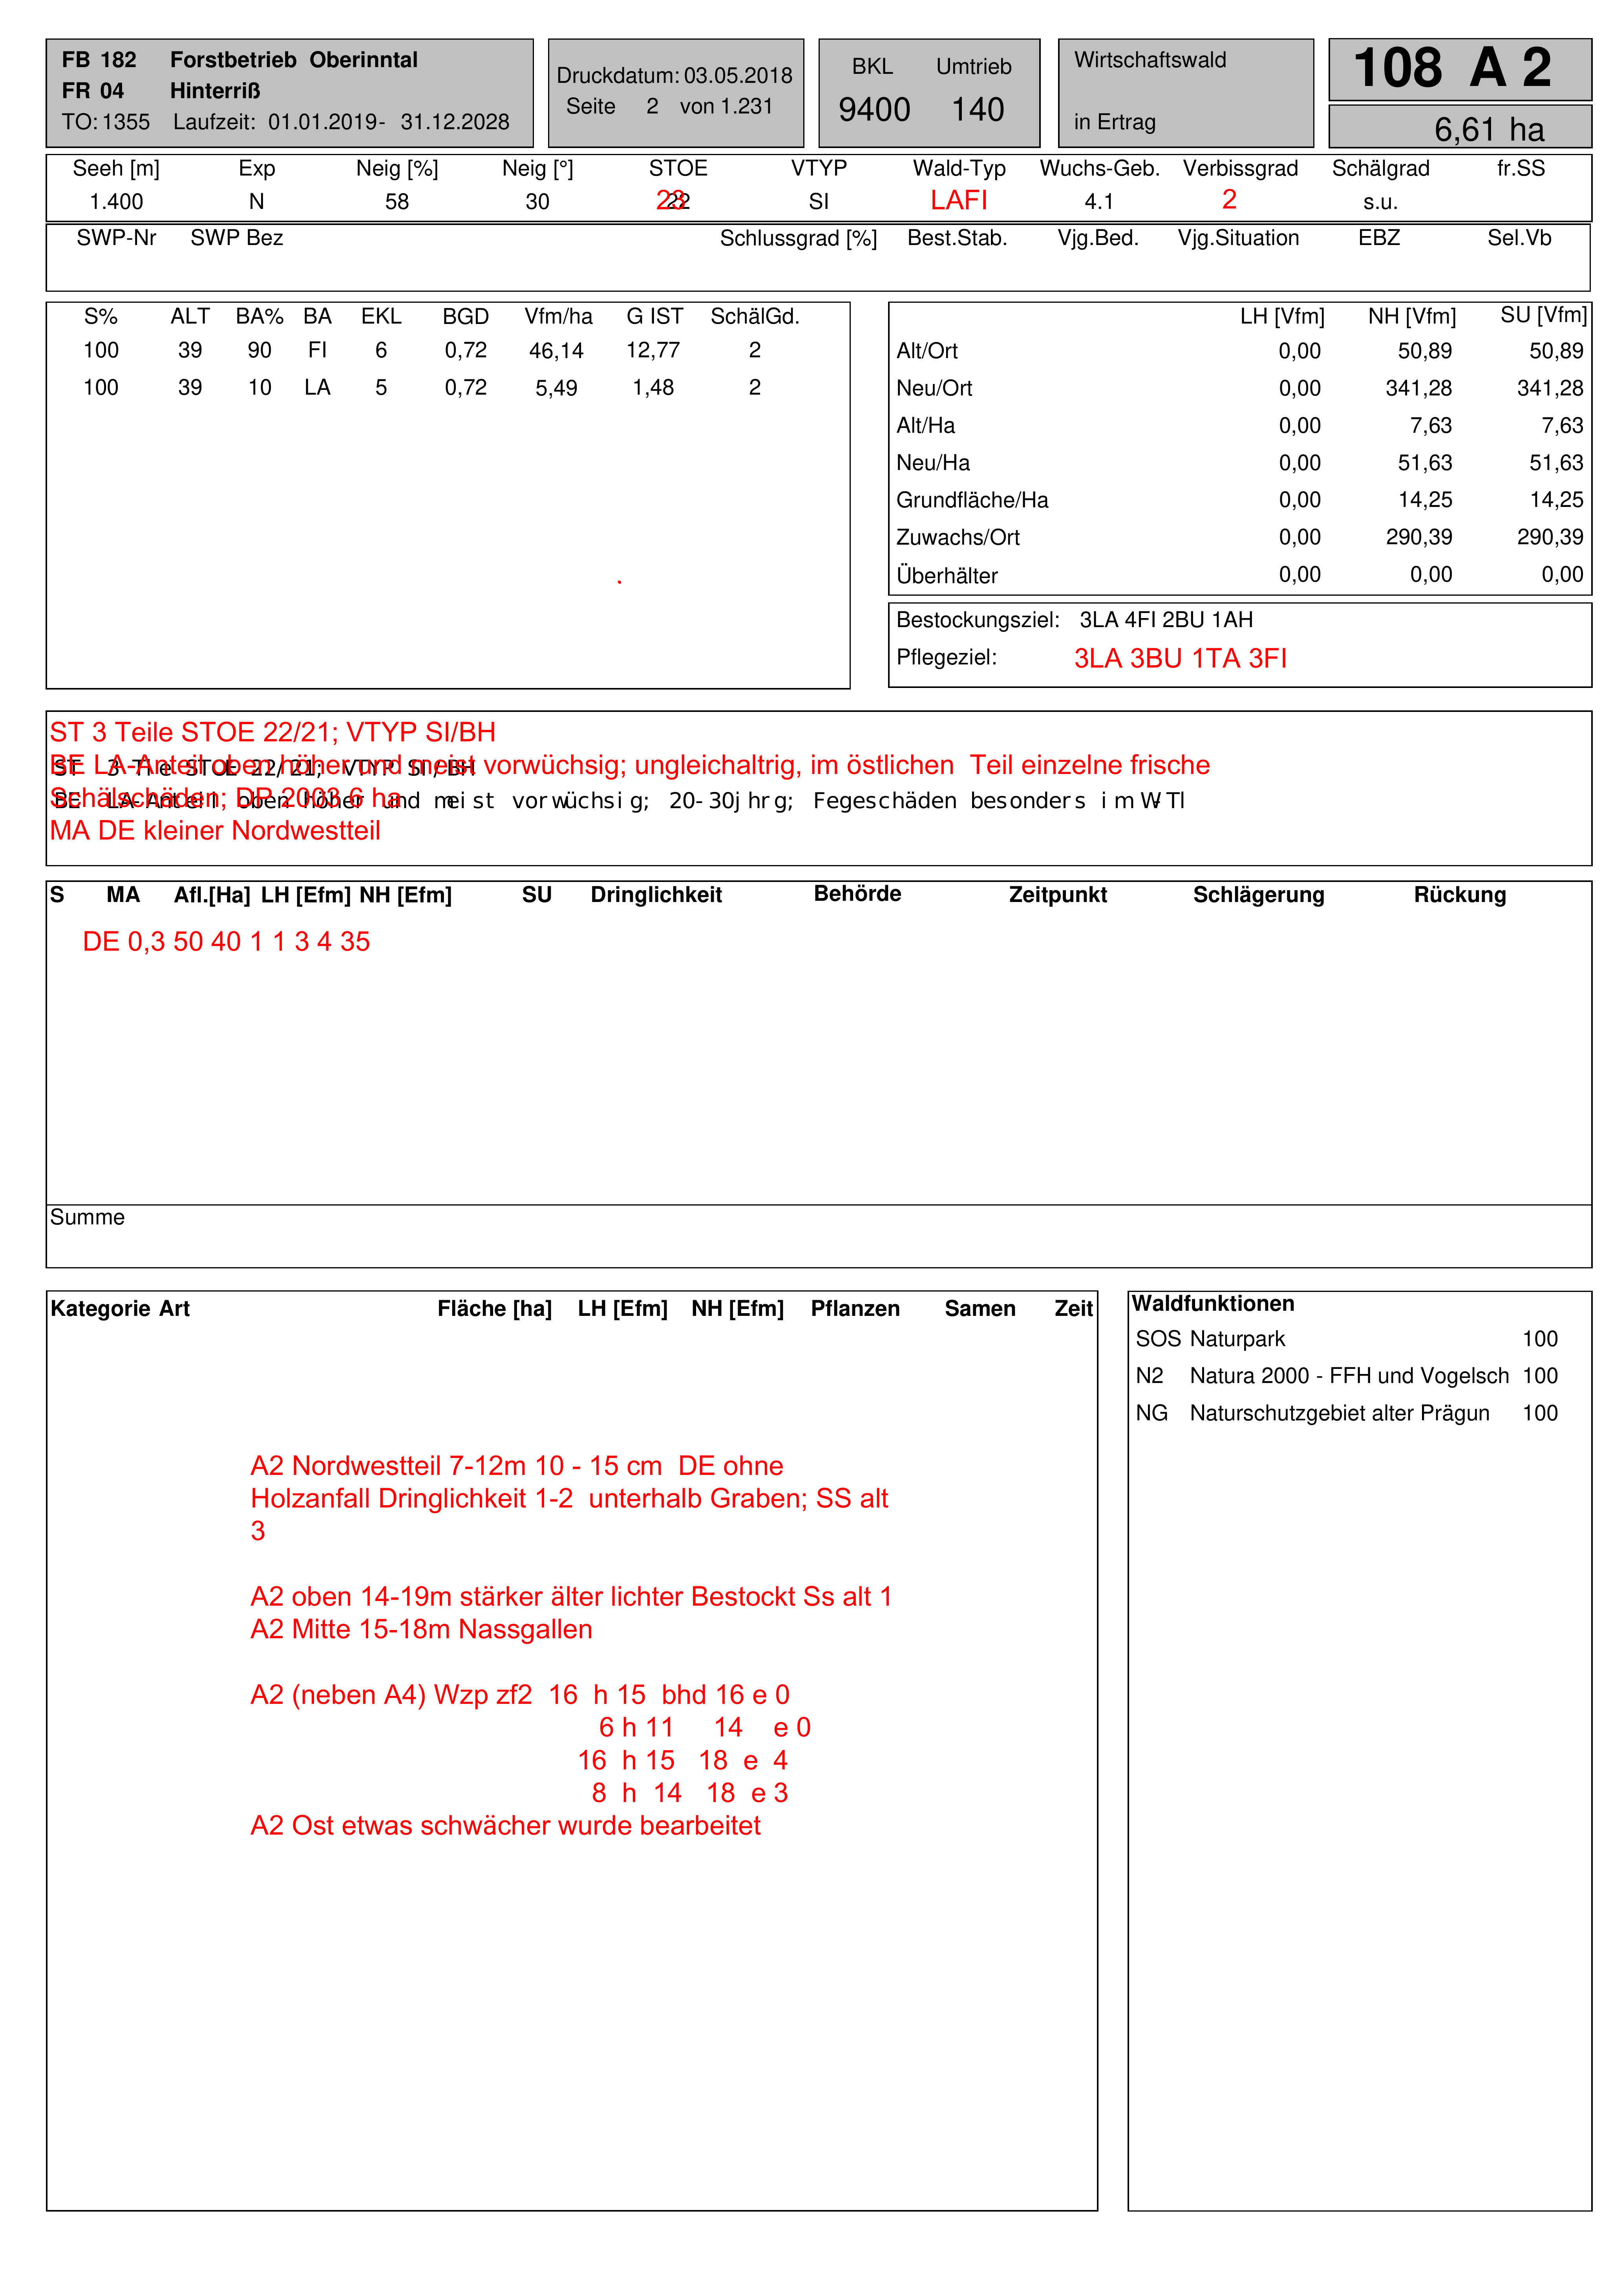

In [8]:
img

In [9]:
# Convert PIL image to numpy array
img = np.array(img)
# Convert RGB to BGR
#img = img[:, :, ::-1].copy()

In [10]:
img.shape

(5847, 4134, 3)

In [11]:
from OCRPage import OCRPage

In [12]:
ocr = OCRPage(img)

In [13]:
ocr.convert()

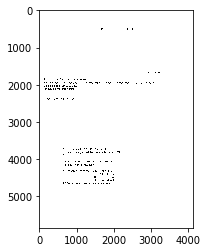

In [14]:
plt.imshow(ocr.img_thresh, 'gray')

In [15]:
ocr.get_text('mass')

'DE 0,3 50 40 113435'

In [16]:
ocr.get_text('bz')

'3LA 3BU 1TA 3FI'

In [17]:
ocr.get_text('text')

'ST 3 Teile STOE 22/21; VTYP SI/BH\n\nBE LA-Anteil oben hoher und meist vorwuchsig; ungleichaltrig, im ostlichen Teil einzelne frische\nSchalschaden; DP 2003 6 ha\n\nMA DE kleiner Nordwestteil'

In [18]:
ocr.get_text('stoe')

'23'

In [19]:
ocr.get_text('vtyp')

''

In [20]:
ocr.get_text('wtyp')

'LAFI'

In [21]:
ocr.get_text('vg')

'2'

In [22]:
ocr.get_text('fss')

''

## Cut image

In [11]:
def cut_img(img, cut):
    '''
        cuts the desired part [cut_boundries] out of the image [self.img]
        in:     cut_boundries   (array with boundries)
        out:
    '''
    # cut image
    return(img[cut[0]:cut[1], cut[2]:cut[3], :])

### cut Abteilung

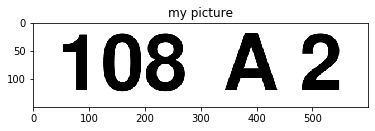

In [13]:
img_abt = cut_img(img, cut = [100, 250, 3400, 4000])

gray = cv2.cvtColor(img_abt, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,'gray')
plt.title('my picture')
plt.show()

### cut Maßnahme

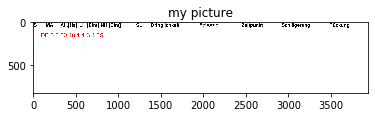

True

In [14]:
img_ma = cut_img(img, cut = [2242, 3070, 120, 4055])

#gray = cv2.cvtColor(img_abt, cv2.COLOR_BGR2GRAY)

plt.imshow(img_ma)
plt.title('my picture')
plt.show()
cv2.imwrite('text.png', img_ma) 

### cut Bestockungsziel

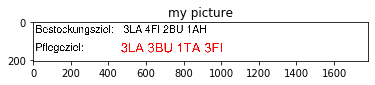

True

In [15]:
img_bz = cut_img(img, cut = [1540, 1745, 2270, 4050])

#gray = cv2.cvtColor(img_abt, cv2.COLOR_BGR2GRAY)

plt.imshow(img_bz)
plt.title('my picture')
plt.show()
cv2.imwrite('text.png', img_bz) 

### cut Text

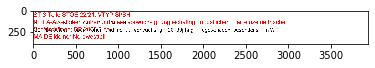

True

In [16]:
img_txt = cut_img(img, cut = [1810, 2200, 120, 4055])

#gray = cv2.cvtColor(img_abt, cv2.COLOR_BGR2GRAY)

plt.imshow(img_txt)
plt.show()
img_txt_print = img_txt[:, :, ::-1].copy()
cv2.imwrite('text.png', img_txt_print) 

### cut Standort

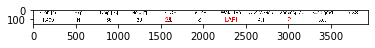

True

In [30]:
img_stoe = cut_img(img, cut = [400, 560, 120, 4055])

#gray = cv2.cvtColor(img_abt, cv2.COLOR_BGR2GRAY)

plt.imshow(img_stoe)
plt.show()
cv2.imwrite('text.png', img_stoe) 

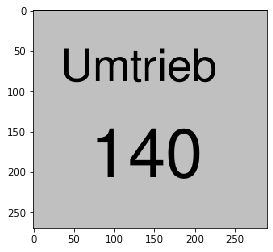

In [71]:
img_stoe = cut_img(img, cut = [100, 370, 2350, 2640])

#gray = cv2.cvtColor(img_abt, cv2.COLOR_BGR2GRAY)

plt.imshow(img_stoe)
plt.show()

In [101]:
img_txt = cv2.imread('text.png')
img_txt = img_txt[:, :, ::-1]

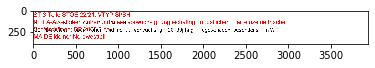

In [102]:
plt.imshow(img_txt)

In [103]:
img_txt.shape

(390, 3935, 3)

In [108]:
def filter_red_img(img):
    '''
        * private *
        filter just red color
        in:     im          (RGB image)
        out:    output_img  (red filterd image)
    '''
    # convert to hsv
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(img_hsv, lower_red, upper_red)
    # upper mask (170-180)
    lower_red = np.array([170,50,80])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(img_hsv, lower_red, upper_red)
    ## Merge the mask and crop the red regions
    mask = cv2.bitwise_or(mask0, mask1)
    croped = cv2.bitwise_and(img_hsv, img_hsv, mask=mask)
    # join my masks
    #mask = mask0 + mask1
    # apply mask
    #img2 = img[np.where(mask==0)] = 255
    
    return(mask, croped)

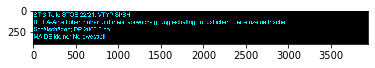

In [109]:
mask, img_txt_f = filter_red_img(img_txt)
img_txt_f
plt.imshow(img_txt_f, 'gray')

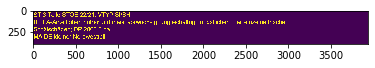

In [110]:
plt.imshow(mask)

In [59]:
img_hsv = cv2.cvtColor(img_txt, cv2.COLOR_BGR2HSV)

In [60]:
img_hsv[48, 1134]

array([120, 255, 255], dtype=uint8)

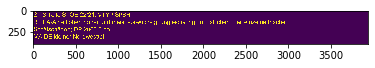

In [65]:
lower_red = np.array([100,200,200])
upper_red = np.array([140,255,255])

mask = cv2.inRange(img_hsv, lower_red, upper_red)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
res = cv2.bitwise_and(img_txt,img_txt, mask= mask)
#res = img_txt[np.where(mask==0)] = 255

plt.imshow(mask)


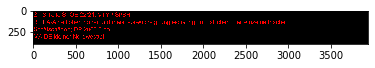

In [66]:
plt.imshow(res)

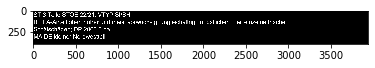

In [112]:
img_gray = cv2.cvtColor(img_txt_f, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, 'gray')

In [113]:
cv2.imwrite('gray.png', img_gray) 

True

In [114]:
ret, img_thr = cv2.threshold(img_gray, 90, 255, cv2.THRESH_BINARY_INV)

In [115]:
img_thr.shape

(390, 3935)

In [116]:
np.unique(np.reshape(img_thr, img_thr.shape[0] * img_thr.shape[1]))

array([  0, 255], dtype=uint8)

In [117]:
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img_thr, config=custom_config)

'ST 3 Teile STOE 22/21; VTYP SI/BH\n\nBE LA-Anteil oben hoher und meist vorwuchsig; ungleichaltrig, im ostlichen Teil einzelne frische\nSchalschaden; DP 2003 6 ha\n\nMA DE kleiner Nordwestteil'

In [ ]:
h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
